## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train_str), (x_test, y_test_str) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [38]:
print(x_train.shape)
print(y_train_str.shape)
print(x_test.shape)
print(y_test_str.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
"60000 samples are available"

### Find dimensions of an image in the dataset

In [76]:
img=x_train[11]
img.shape

(28, 28, 1)

In [0]:
# Dimension is 1, this is a grey scale image

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
!pip3 install -U tensorflow==1.15 --quiet

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_str, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_str, num_classes=10)

In [40]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


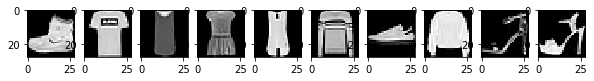

In [25]:
#Lets print the image as well
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
for i in range(1, 11,1):
  fig.add_subplot(1, 10, i)
  plt.imshow(x_train[i-1],cmap='gray')
plt.show()

### Normalize both the train and test image data from 0-255 to 0-1

In [41]:
x_train.dtype

dtype('uint8')

In [0]:
# (x_train, y_train_str), (x_test, y_test_str)


x_train = x_train/255
x_test = x_test/255

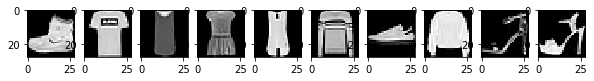

In [43]:
#Lets print the image after normalization 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
for i in range(1, 11,1):
  fig.add_subplot(1, 10, i)
  plt.imshow(x_train[i-1],cmap='gray')
plt.show()

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [44]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [46]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.3718 - acc: 0.8673 - val_loss: 0.3037 - val_acc: 0.8883
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.2302 - acc: 0.9143 - val_loss: 0.2824 - val_acc: 0.8940
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.1664 - acc: 0.9376 - val_loss: 0.2561 - val_acc: 0.9132
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1111 - acc: 0.9588 - val_loss: 0.2745 - val_acc: 0.9104
Epoch 5/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0748 - acc: 0.9733 - val_loss: 0.3202 - val_acc: 0.9089
Epoch 6/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0505 - acc: 0.9826 - val_loss: 0.3576 - val_acc: 0.9083
Epoch 7/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0338 - acc: 0.9880 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [48]:
    modelPooling = Sequential()

    # 1st Conv Layer
    modelPooling.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    modelPooling.add(Activation('relu'))

    # 2nd Conv Layer
    modelPooling.add(Convolution2D(32, 3, 3))
    modelPooling.add(Activation('relu'))


    # Max Pooling
    modelPooling.add(MaxPooling2D(pool_size=(2,2)))


    # Dropout
    modelPooling.add(Dropout(0.25))


    # Fully Connected Layer
    modelPooling.add(Flatten())
    modelPooling.add(Dense(128))
    modelPooling.add(Activation('relu'))

    # Prediction Layer
    modelPooling.add(Dense(10))
    modelPooling.add(Activation('softmax'))

    # Loss and Optimizer
    modelPooling.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the modelPooling
    modelPooling.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.3951 - acc: 0.8581 - val_loss: 0.3078 - val_acc: 0.8865
Epoch 2/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.2578 - acc: 0.9054 - val_loss: 0.2418 - val_acc: 0.9115
Epoch 3/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.2115 - acc: 0.9212 - val_loss: 0.2327 - val_acc: 0.9134
Epoch 4/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.1801 - acc: 0.9320 - val_loss: 0.2350 - val_acc: 0.9182
Epoch 5/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1515 - acc: 0.9431 - val_loss: 0.2389 - val_acc: 0.9189
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1293 - acc: 0.9514 - val_loss: 0.2382 - val_acc: 0.9218
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.1114 - acc: 0.9579 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

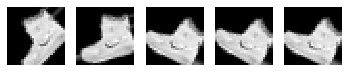

In [50]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
 modelPooling.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [55]:
modelPooling.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5621 - acc: 0.8010 - val_loss: 0.2781 - val_acc: 0.9031
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3722 - acc: 0.8642 - val_loss: 0.2986 - val_acc: 0.9024
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3310 - acc: 0.8784 - val_loss: 0.2748 - val_acc: 0.9052
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3054 - acc: 0.8878 - val_loss: 0.2888 - val_acc: 0.9067
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2933 - acc: 0.8922 - val_loss: 0.2687 - val_acc: 0.9158
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2776 - acc: 0.8975 - val_loss: 0.2588 - val_acc: 0.9121
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2737 - acc: 0.9004 - val_loss: 0.2721 - val_acc: 0.9128
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [56]:
loss_and_metrics = modelPooling.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 63us/step
[0.14762089980108042, 0.94575]


In [58]:
print("Loss is: 0.14762089980108042 and Accuracy is : 94.57%", )

Loss is: 0.14762089980108042 and Accuracy is : 94.57%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Libraries are already imported in the notebook

### **Load CIFAR10 dataset**

In [0]:
(x_train2, y_train_str2), (x_test2, y_test_str2) = tf.keras.datasets.cifar10.load_data();

In [61]:
print(x_train2.shape)
print(y_train_str2.shape)
print(x_test2.shape)
print(y_test_str2.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train2)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

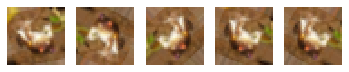

In [71]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'))
    plt.plot()
plt.show()